**Importing libraries**

In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Demonstrate that the dataset can be read from the web into R**

In [2]:
# downloading data to fiel_path
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
temp_file <- tempfile(fileext = ".zip")
download.file(url, destfile = temp_file, mode = "wb")
unzip(temp_file, exdir = "GroupProject/heart_data")
file_path <- "GroupProject/heart_data/cleve.mod"


# reading data into heart_data
heart_data <- read_table(file_path, skip = 20)


── Column specification ────────────────────────────────────────────────────────
cols(
  `63.0` = col_double(),
  male = col_character(),
  angina = col_character(),
  `145.0` = col_double(),
  `233.0` = col_double(),
  true = col_character(),
  hyp = col_character(),
  `150.0` = col_double(),
  fal = col_character(),
  `2.3` = col_double(),
  down = col_character(),
  `0.0` = col_character(),
  fix = col_character(),
  buff = col_character(),
  H = col_character()
)



**Clean and wrangle your data into a tidy format**

In [3]:
# assigning  names to each column
names <- c("Age","sex","chest_pain_type","Trestbps",
                    "cholesteral","fasting_blood_sugar_larger_than_120", "resting_ecg",
                    "max_heart_rate","exercise_induced_angina","oldpeak",
                    "slope","number_of_vessels_colored","thal","heathy")
colnames(heart_data) <- names

# selecting sueful columns
heart_data <- heart_data|> 
    select(Age,sex,chest_pain_type,Trestbps,cholesteral,fasting_blood_sugar_larger_than_120,resting_ecg,max_heart_rate,
          exercise_induced_angina,number_of_vessels_colored,thal,heathy)

head(heart_data)

Age,sex,chest_pain_type,Trestbps,cholesteral,fasting_blood_sugar_larger_than_120,resting_ecg,max_heart_rate,exercise_induced_angina,number_of_vessels_colored,thal,heathy
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
67,male,asympt,160,286,fal,hyp,108,true,3.0,norm,sick
67,male,asympt,120,229,fal,hyp,129,true,2.0,rev,sick
37,male,notang,130,250,fal,norm,187,fal,0.0,norm,buff
41,fem,abnang,130,204,fal,hyp,172,fal,0.0,norm,buff
56,male,abnang,120,236,fal,norm,178,fal,0.0,norm,buff
62,fem,asympt,140,268,fal,hyp,160,fal,2.0,norm,sick


**Spliting data**

In [4]:
# splitting data into training and testing
set.seed(2004)
heart_disease_split <- initial_split(heart_data,prop = 0.75, strata = sex)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [59]:
# I plan to use Trestbps, Cholesteral and Max_Heart_Rate as predictors
# None of the rows have missing data since we already addressed this issue when importing the data
# Datasets below shows the count for healhty and sick observations and mean of each of our predictors 

heart_disease_info <- heart_disease_train |>
    mutate(Observation_count = n()) |>
    mutate(Mean_Trestbps = mean(Trestbps)) |>
    mutate(Mean_Cholesteral = mean(cholesteral)) |>
    mutate(Mean_Max_Heart_Rate = mean(max_heart_rate)) |>
    mutate(Mean_Age = mean(Age)) |>
    select(Observation_count,Mean_Age,Mean_Trestbps,Mean_Cholesteral,Mean_Max_Heart_Rate) |>
    distinct()

sick_data <- heart_disease_train |>
    filter(heathy == "sick") |>
    mutate(Observation_count = n()) |>
    mutate(Sick_Mean_Trestbps = mean(Trestbps)) |>
    mutate(Sick_Mean_Cholesteral = mean(cholesteral)) |>
    mutate(Sick_Mean_Max_Heart_Rate = mean(max_heart_rate)) |>
    mutate(Sick_Mean_Age = mean(Age)) |>
    select(Observation_count,Sick_Mean_Age,Sick_Mean_Trestbps,Sick_Mean_Cholesteral,Sick_Mean_Max_Heart_Rate) |>
    distinct()

healthy_data <- heart_disease_train |>
    filter(heathy == "buff") |>
    mutate(Observation_count = n()) |>
    mutate(Healthy_Mean_Trestbps = mean(Trestbps)) |>
    mutate(Healthy_Mean_Cholesteral = mean(cholesteral)) |>
    mutate(Healthy_Mean_Max_Heart_Rate = mean(max_heart_rate)) |>
    mutate(Healthy_Mean_Age = mean(Age)) |>
    select(Observation_count,Healthy_Mean_Age,Healthy_Mean_Trestbps,Healthy_Mean_Cholesteral,Healthy_Mean_Max_Heart_Rate) |>
    distinct()

heart_disease_info
sick_data
healthy_data

Observation_count,Mean_Age,Mean_Trestbps,Mean_Cholesteral,Mean_Max_Heart_Rate
<int>,<dbl>,<dbl>,<dbl>,<dbl>
226,54.16372,131.2434,248.5796,149.8628


Observation_count,Sick_Mean_Age,Sick_Mean_Trestbps,Sick_Mean_Cholesteral,Sick_Mean_Max_Heart_Rate
<int>,<dbl>,<dbl>,<dbl>,<dbl>
96,56.14583,134.1146,255.3021,138.6562


Observation_count,Healthy_Mean_Age,Healthy_Mean_Trestbps,Healthy_Mean_Cholesteral,Healthy_Mean_Max_Heart_Rate
<int>,<dbl>,<dbl>,<dbl>,<dbl>
130,52.7,129.1231,243.6154,158.1385


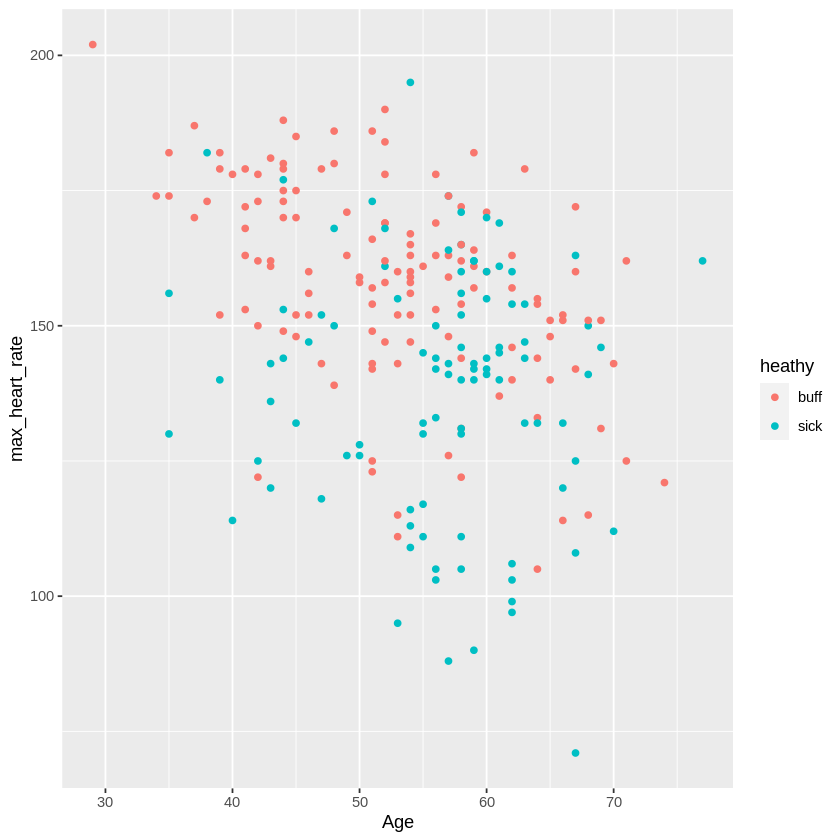

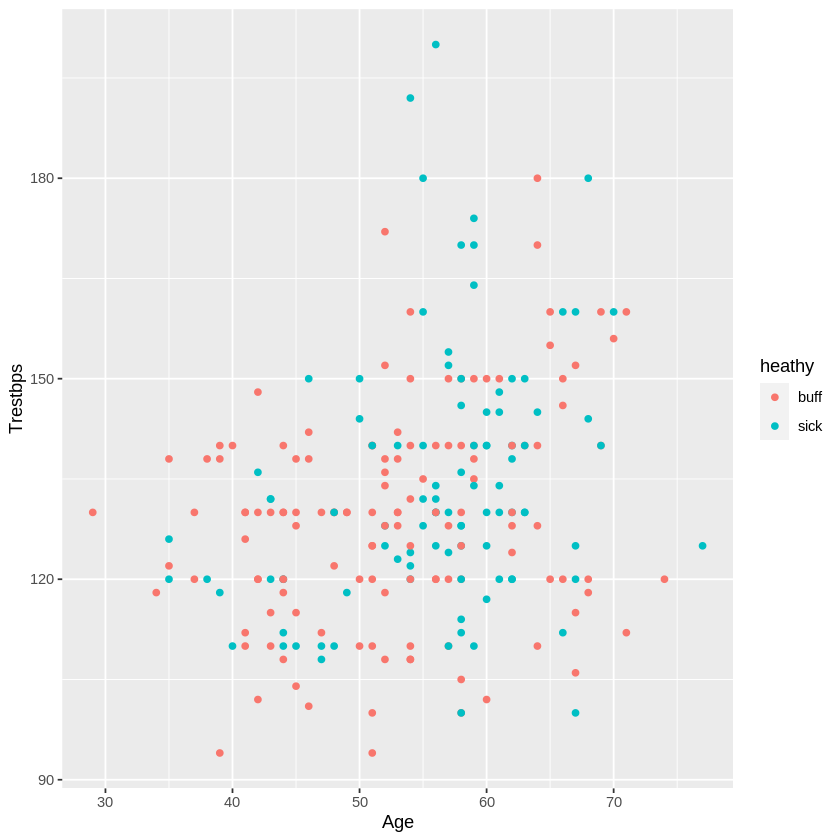

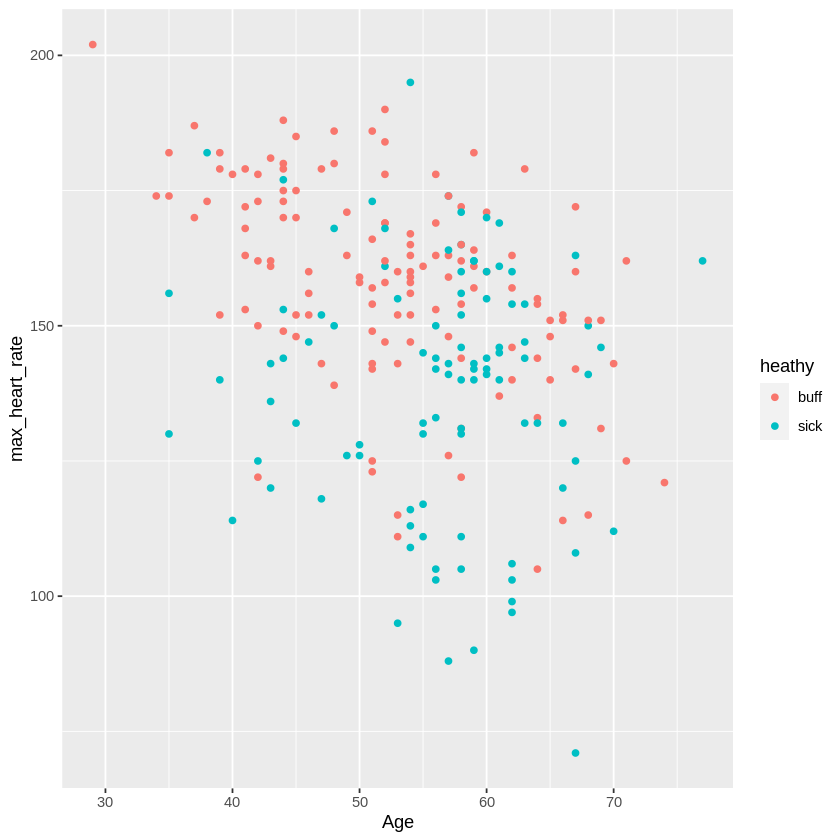

In [52]:
# visualization

# Age against cholesteral
Trestbps_plot <- heart_disease_train |>
    ggplot(aes(x = Age,y= max_heart_rate,color = heathy)) +
    geom_point()

Trestbps_plot

# Age against Trestbps
Trestbps_plot <- heart_disease_train |>
    ggplot(aes(x = Age,y= Trestbps,color = heathy)) +
    geom_point()

Trestbps_plot

# Age against max_heart_rate	
Trestbps_plot <- heart_disease_train |>
    ggplot(aes(x = Age,y= max_heart_rate,color = heathy)) +
    geom_point()

Trestbps_plot
